## Redução de dimensionalidade

* Muitos problemas de aprendizado de máquina apresentam dados descritos com uma grande quantidade de atributos; 
    * Ex. Reconhecimento de imagem, classificação de textos

* Muitos atributos podem resultar em dificuldades na aprendizagem

**Problema:** Como reduzir a dimensão do dado minimizando a perda de informação?
    
   * **Selecionar atributos:** atributos selecionados através 
        * Selecionar atributos  a partir dos dados (filter)
        * Selecionar atributos a partir de um resultado de um modelo (wrapper)
        * Modelo realiza o rteinamento e a seleção simultaneament (embedded)
        
   
   * **Combinar atributos:** selecionar atributos pode gerar perda de informação?

## Análise de Componentes Principais (PCA - do inglês Principal Component Analysis) 

* PCA é uma técnica não-supervisionada de geração de atributos a partir da combinação linear dos atributos originais
* Escolhendo um subconjunto dos atributos gerados, podemos utilizar PCA para reduzir a dimensionalidade


<img src="fig_pca/exempo_vetor.jpg" width="30%" height="30%"/>

**Figura**: Neste exemplo, x1 e x2 são os eixos das features originais e PC1 e PC2 são os componentes principais.

### Ideia geral

* Dado: um conjunto de dados descrito por vetores de $n$ dimensões
* Objetivo: buscar $k$ vetores ortogonais de $n$ dimensões que melhor representem o dado, onde $k\leq n$
* A análise PCA procura encontrar as direções de variança máxima nos dados de alta dimensão e projetá-las em um novo sub-espaço
* Os eixos ortogonais (principais componentes) do novo sub-espaço podem ser interpretados como as direção de variança máxima dada a restrição de ortogonalidade


### Transformação linear 

$ x = [x_1, x_2, \dots, x_n ]$, $x \in R^n$

$z = xW, W \in R^{n\times k}$

$z = [z_1, z_2, \dots, z_k], z \in R^k$

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

In [17]:
import pandas as pd
df = pd.DataFrame(data=iris['data'], columns=iris.feature_names)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = iris.data
y = iris.target

In [100]:
df['class'] = y

In [21]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208EAB02978>,
      dtype=object)

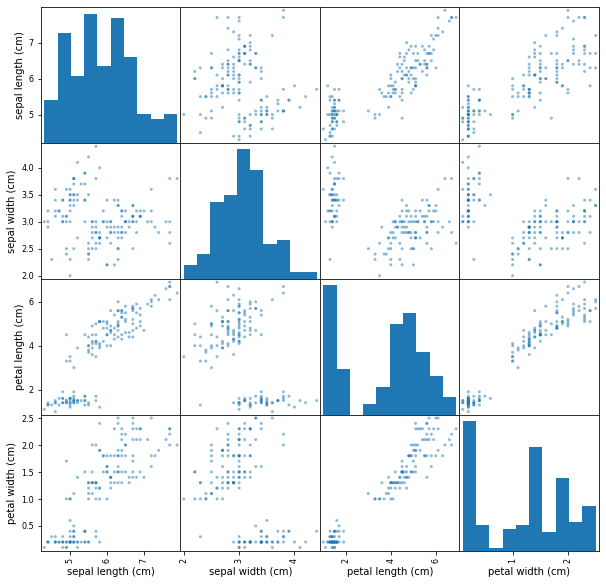

In [24]:
scatter_matrix(df, figsize=(10,10))

### Definindo as direções de vairância máxima 

* A normalização dos dados dentro de um mesmo intervalo impede que um atributo com um conjunto domínio grande "domine" um atributo com um conjunto domínio menor

* Os autovetores da matriz de covariancia representam os principais componentes (as direções de variência máxima), os correspondentes autovalores são a magnitude.


#### Normalizar os dados de acordo com a média e o desvio padrão 
$z = (x - u) / s$

$x$ é o dado original, $u$ é a média e /4s$ o desvio padrão

In [53]:
from sklearn.preprocessing import StandardScaler
import numpy as np
df_std.cov()
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [39]:
df_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [51]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [48]:
df.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [49]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [52]:
df_std.std()

sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64

In [46]:
df_std.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [47]:
df_std.std()

sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64

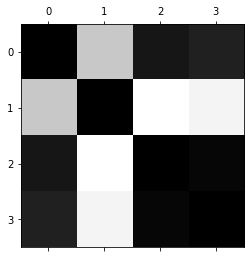

In [62]:
import matplotlib.pyplot as plt
plt.matshow(df_std.cov(),cmap="binary")
plt.show()

#### Calculando os principais componentes

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(df_std)

In [68]:
df_pca = pd.DataFrame(data=pca_result)

### PCA remove a correlação dos dados

Scatter plot após PCA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208F45E27B8>,
      dtype=object)

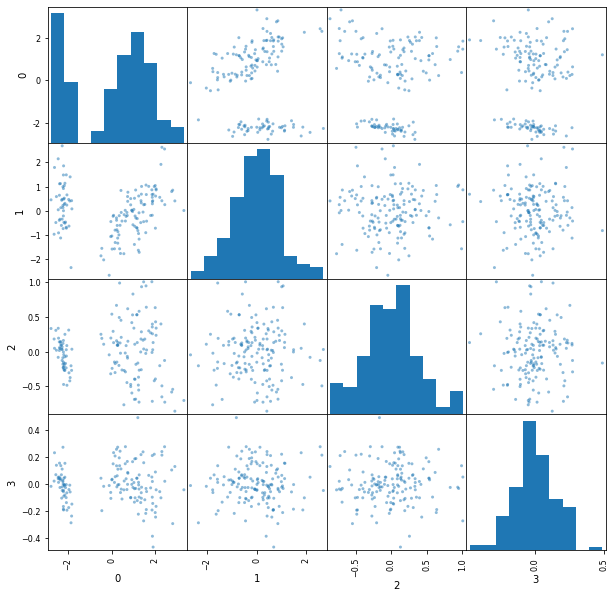

In [71]:
scatter_matrix(df_pca, figsize=(10,10))

Matriz de correlação após PCA

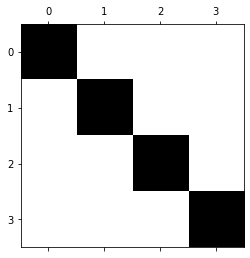

In [73]:
plt.matshow(df_pca.corr(),cmap="binary")
plt.show()

### Visulizando e entendendo os componentes

O vetor abaixo explica a importância de cada componente para o dataset. Por exemplo, o primeiro componente (índice 0) explica ~72% do data set, o segundo 22%, e assim por diante. Quando manipulamos um dataset com muita correlação, esses valores ficam concentrados nos primeiros componentes, o que significa que os componentes restantes podem ser descartados.

In [75]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [90]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

O valor resultante é um combinação linear dos valores originais e dos vetores de cada componente

PC1 = 0.52106591 * 'sepal length (cm)' +  -0.26934744 * 'sepal width (cm)' +  0.5804131 * 'petal length (cm)' +  0.56485654 * 'petal width (cm)'

In [118]:
df_std["PC1"] = pca_result[:,0]
df_std["PC2"] = pca_result[:,1]
df_std["PC3"] = pca_result[:,2]
df_std["PC4"] = pca_result[:,3]

In [103]:
df_std['class'] = iris.target

In [106]:
df_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,class
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,0
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,0
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0


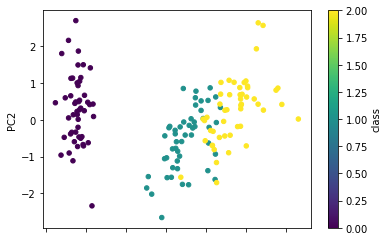

In [125]:
df_std.plot.scatter(x='PC1', y='PC2',c='class',colormap='viridis')

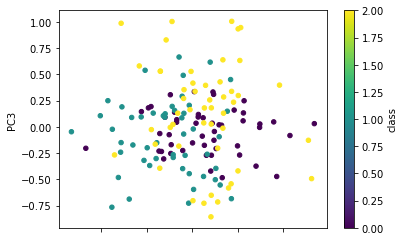

In [127]:
df_std.plot.scatter(x='PC2', y='PC3',c='class',colormap='viridis')

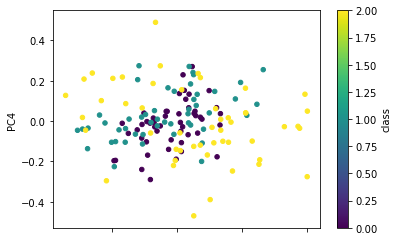

In [128]:
df_std.plot.scatter(x='PC3', y='PC4',c='class', colormap='viridis')

### Compressão de imagens usando PCA

In [150]:
import matplotlib.image as image
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
from matplotlib.image import imread

import matplotlib.pyplot as plt

In [192]:
img = imread('fig_pca/onca.png')

In [201]:
img.shape

(1664, 2500, 3)

In [193]:
print("Número de linhas: %d" % img.shape[0])
print("Número de colunas: %d" % img.shape[1])
print("Número de canais: %d" % img.shape[2])

Número de linhas: 1664
Número de colunas: 2500
Número de canais: 3


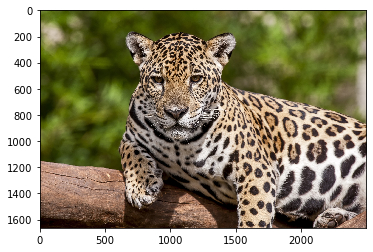

In [194]:
fig = plt.figure()
plt.imshow(img)

In [202]:
x = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))

In [204]:
print("Número de atributos: %d" % x.shape[1])

Número de atributos: 7500


In [224]:
pca = PCA(0.90)

In [225]:
X_pca = pca.fit_transform(x)

In [226]:
X_pca.shape

(1664, 47)

In [227]:
img_reconstructed = pca.inverse_transform(X_pca)

In [228]:
img_reconstructed = img_reconstructed.reshape(img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


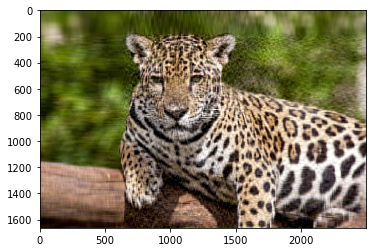

In [229]:
fig = plt.figure()
plt.imshow(img_reconstructed)